In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import table
%matplotlib inline

In [32]:
# ctalog downloaded from
# https://github.com/KiDS-WL/MultiBand_ImSim

# sharkPhotometry = SDSS MAGNITUDES!

data = table.Table.read('~/Downloads/skills_v07D7p1_LF_321_sharkPhotometry_everything_col_flag_shear_m283m283_rot_0.fits')

In [33]:
# there is normally a catalog of detections, and the total catalog with detections and non-detections.

In [34]:
band_names = ['u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'Ks']
ind = np.repeat(True, len(data))
for b in band_names:
    ind &= data[b+'_input'] > 0
print(np.sum(ind), ind.size)
data = data[ind]

9489637 11161407


In [36]:
# depth or hard cut?

In [37]:
ind = data['flag_gaap'] == 0
data = data[ind]

In [38]:
data.colnames

['NUMBER',
 'X_WORLD',
 'Y_WORLD',
 'FLUX_AUTO',
 'FLUXERR_AUTO',
 'MAG_AUTO',
 'MAGERR_AUTO',
 'FLUX_RADIUS',
 'A_IMAGE',
 'B_IMAGE',
 'A_WORLD',
 'B_WORLD',
 'ERRA_IMAGE',
 'ERRB_IMAGE',
 'ERRA_WORLD',
 'ERRB_WORLD',
 'THETA_IMAGE',
 'THETA_WORLD',
 'ERRTHETA_IMAGE',
 'ERRTHETA_WORLD',
 'FLAGS',
 'CLASS_STAR',
 'ISOAREA_IMAGE',
 'perfect_flag_star',
 'id_input',
 'RA_input',
 'DEC_input',
 'redshift_input',
 'Re_input',
 'axis_ratio_input',
 'position_angle_input',
 'sersic_n_input',
 'u_input',
 'g_input',
 'r_input',
 'i_input',
 'Z_input',
 'Y_input',
 'J_input',
 'H_input',
 'Ks_input',
 'e1_input',
 'e2_input',
 'Agaper',
 'Bgaper',
 'PAgaap',
 'FLUX_GAAP_u',
 'FLUXERR_GAAP_u',
 'FLAG_GAAP_u',
 'MAG_GAAP_u',
 'MAGERR_GAAP_u',
 'FLUX_GAAP_g',
 'FLUXERR_GAAP_g',
 'FLAG_GAAP_g',
 'MAG_GAAP_g',
 'MAGERR_GAAP_g',
 'FLUX_GAAP_r',
 'FLUXERR_GAAP_r',
 'FLAG_GAAP_r',
 'MAG_GAAP_r',
 'MAGERR_GAAP_r',
 'FLUX_GAAP_i',
 'FLUXERR_GAAP_i',
 'FLAG_GAAP_i',
 'MAG_GAAP_i',
 'MAGERR_GAAP_i',
 'FLU

In [39]:
#cuts on flags?

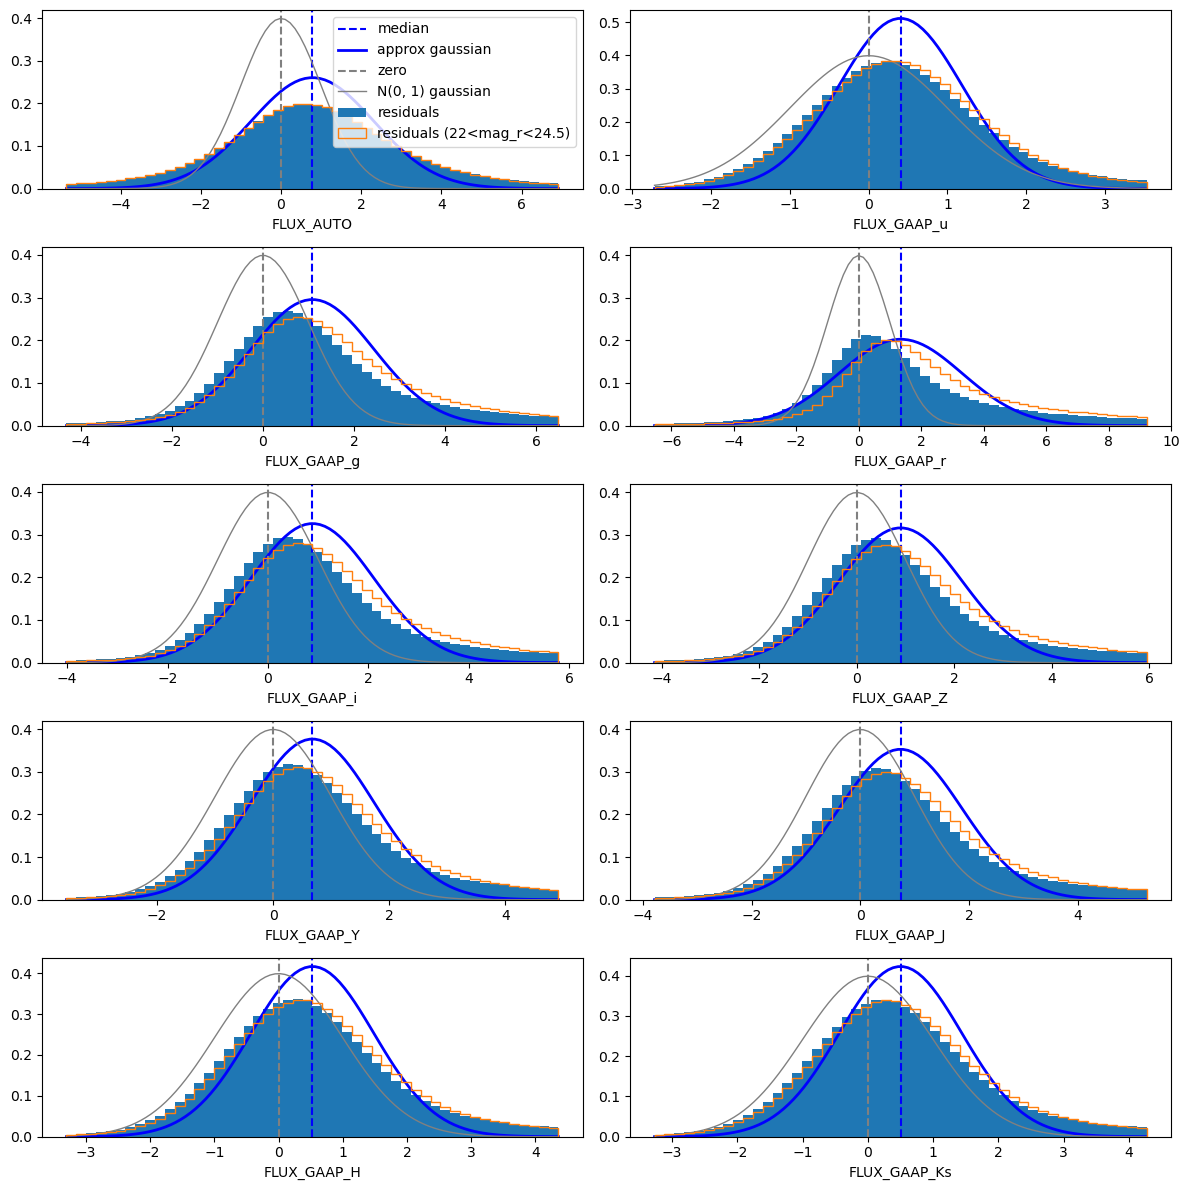

In [40]:
inputs = ['r_input'] + [b+'_input'  for b in band_names]
outputs = ['FLUX_AUTO'] + ['FLUX_GAAP_' + b for b in band_names]
output_errs = ['FLUXERR_AUTO'] + ['FLUXERR_GAAP_' + b for b in band_names]

from scipy.stats import median_abs_deviation
from scipy.stats import norm
off = 0
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
axs = axs.ravel()
for input_, output_, output_err_ in zip(inputs, outputs, output_errs):
    flux = 10**(-0.4 * (data[input_] - 30))
    diff = (flux - data[output_]) / data[output_err_] 
    m, s = np.median(diff), median_abs_deviation(diff)
    #range_ = np.percentile(diff, [1, 99])
    range_ = [m - 4*s, m + 4*s]
    x = np.linspace(range_[0], range_[1], 100)
    axs[off].axvline(m, c='b', ls='--', label='median')
    axs[off].plot(x, norm.pdf(x, loc=m, scale=s), c='b', lw=2, label='approx gaussian')
    axs[off].axvline(0, c='grey', ls='--', label='zero')
    axs[off].plot(x, norm.pdf(x, loc=0, scale=1), c='grey', lw=1, label='N(0, 1) gaussian')
    axs[off].hist(diff, range=range_, bins=50, density=True, label='residuals')
    axs[off].set_xlabel(output_)
    
    ind = np.logical_and(data['r_input'] > 22, data['r_input'] < 24.5)
    axs[off].hist(diff[ind], range=range_, bins=50, density=True, label='residuals (22<mag_r<24.5)', histtype='step')
    
    off += 1
    
axs[0].legend()
fig.tight_layout()

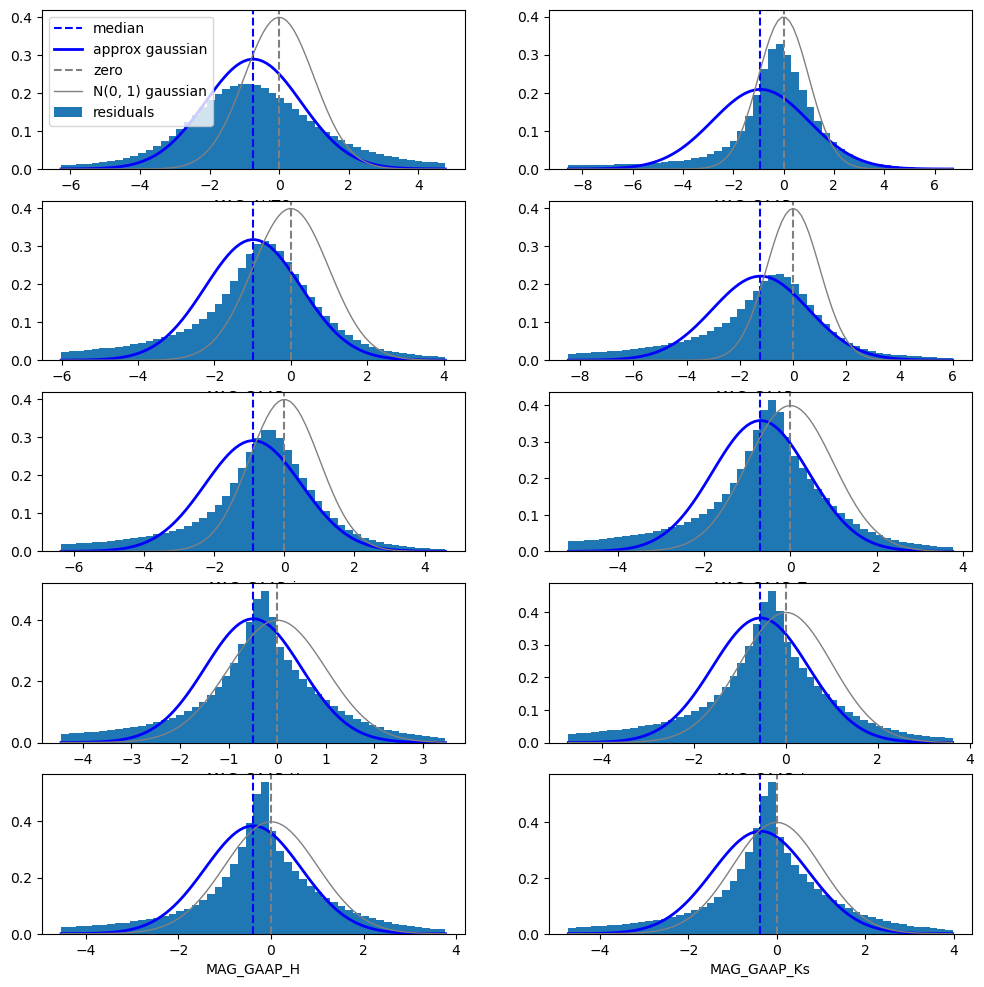

In [52]:
inputs = ['r_input'] + [b+'_input'  for b in band_names]
outputs = ['MAG_AUTO'] + ['MAG_GAAP_' + b for b in band_names]
output_errs = ['MAGERR_AUTO'] + ['MAGERR_GAAP_' + b for b in band_names]

from scipy.stats import median_abs_deviation
off = 0
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
axs = axs.ravel()
for input_, output_, output_err_ in zip(inputs, outputs, output_errs):
    diff = (data[input_] - data[output_]) / data[output_err_] 
    m, s = np.median(diff), median_abs_deviation(diff)
    #range_ = np.percentile(diff, [1, 99])
    range_ = [m - 4*s, m + 4*s]
    x = np.linspace(range_[0], range_[1], 100)
    axs[off].axvline(m, c='b', ls='--', label='median')
    axs[off].plot(x, norm.pdf(x, loc=m, scale=s), c='b', lw=2, label='approx gaussian')
    axs[off].axvline(0, c='grey', ls='--', label='zero')
    axs[off].plot(x, norm.pdf(x, loc=0, scale=1), c='grey', lw=1, label='N(0, 1) gaussian')
    axs[off].hist(diff, range=range_, bins=50, density=True, label='residuals')
    axs[off].set_xlabel(output_)
    
    off += 1
    
axs[0].legend()

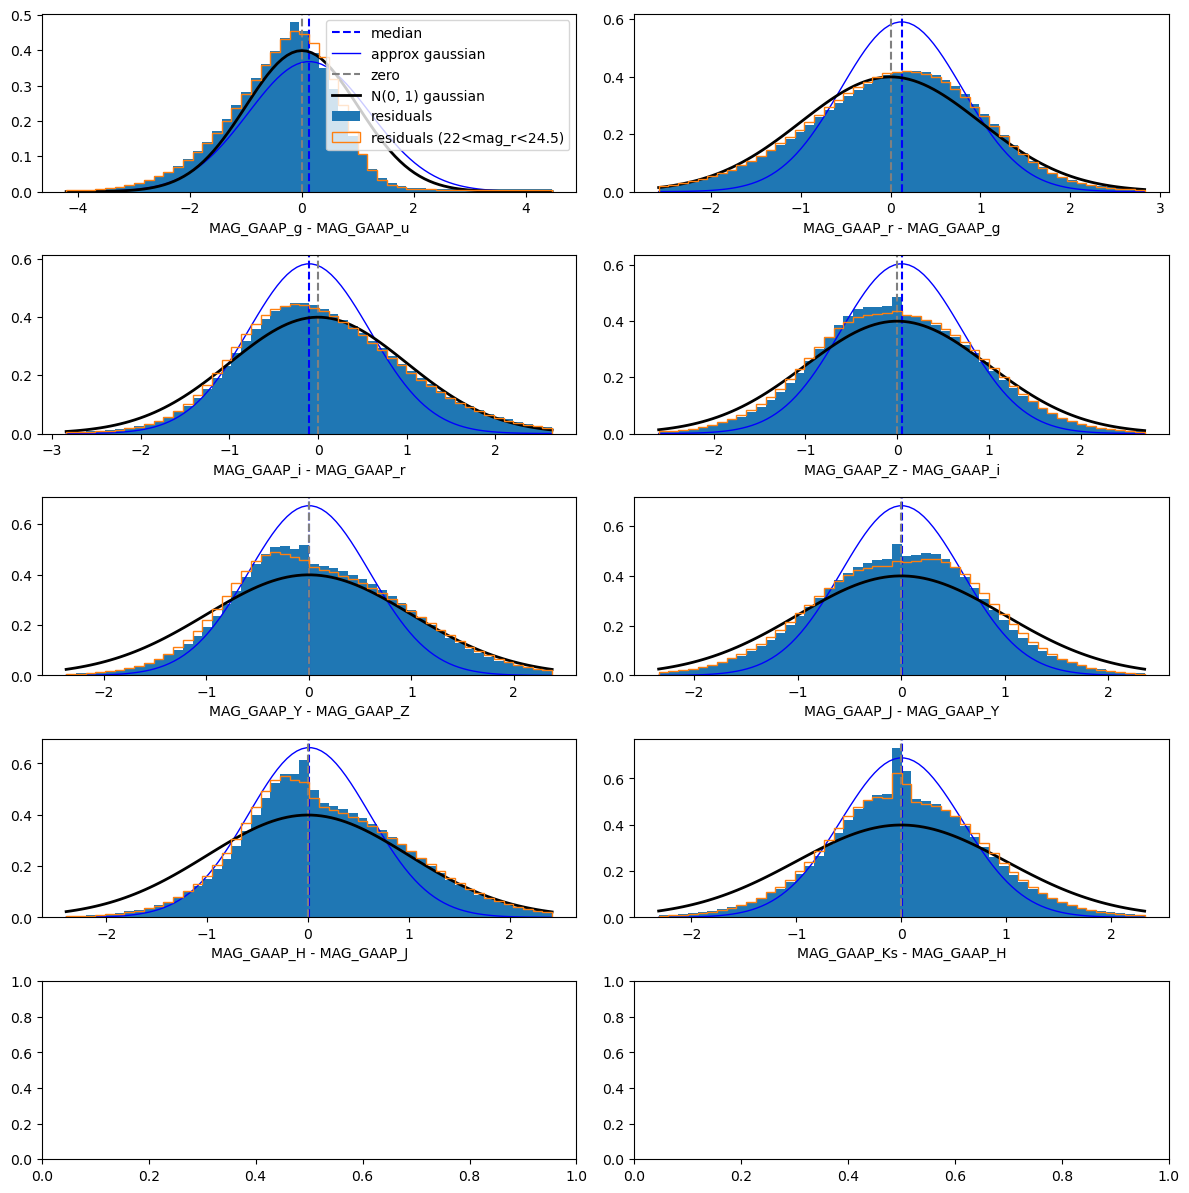

In [42]:
inputs = [b+'_input'  for b in band_names]
outputs = ['MAG_GAAP_' + b for b in band_names]
output_errs = ['MAGERR_GAAP_' + b for b in band_names]

from scipy.stats import median_abs_deviation
from scipy.stats import norm

off = 0
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
axs = axs.ravel()
for off in range(len(inputs)-1):
    color = data[inputs[off+1]] - data[inputs[off]]
    color_obs = data[outputs[off+1]] - data[outputs[off]]
    err = np.sqrt(data[output_errs[off+1]]**2 + data[output_errs[off]]**2)
    diff = (color - color_obs) / err
    m, s = np.median(diff), median_abs_deviation(diff)
    #range_ = np.percentile(diff, [1, 99])
    range_ = [m - 4*s, m + 4*s]
    x = np.linspace(range_[0], range_[1], 100)
    axs[off].axvline(m, c='b', ls='--', label='median')
    axs[off].plot(x, norm.pdf(x, loc=m, scale=s), c='b', lw=1, label='approx gaussian')
    axs[off].axvline(0, c='grey', ls='--', label='zero')
    axs[off].plot(x, norm.pdf(x, loc=0, scale=1), c='k', lw=2, label='N(0, 1) gaussian')
    axs[off].hist(diff, range=range_, bins=50, density=True, label='residuals')
    axs[off].set_xlabel(outputs[off+1] + ' - ' + outputs[off])
    
    ind = np.logical_and(data['r_input'] > 22, data['r_input'] < 24.5)
    axs[off].hist(diff[ind], range=range_, bins=50, density=True, label='residuals (22<mag_r<24.5)', histtype='step')
    
    off += 1
    
axs[0].legend()
fig.tight_layout()

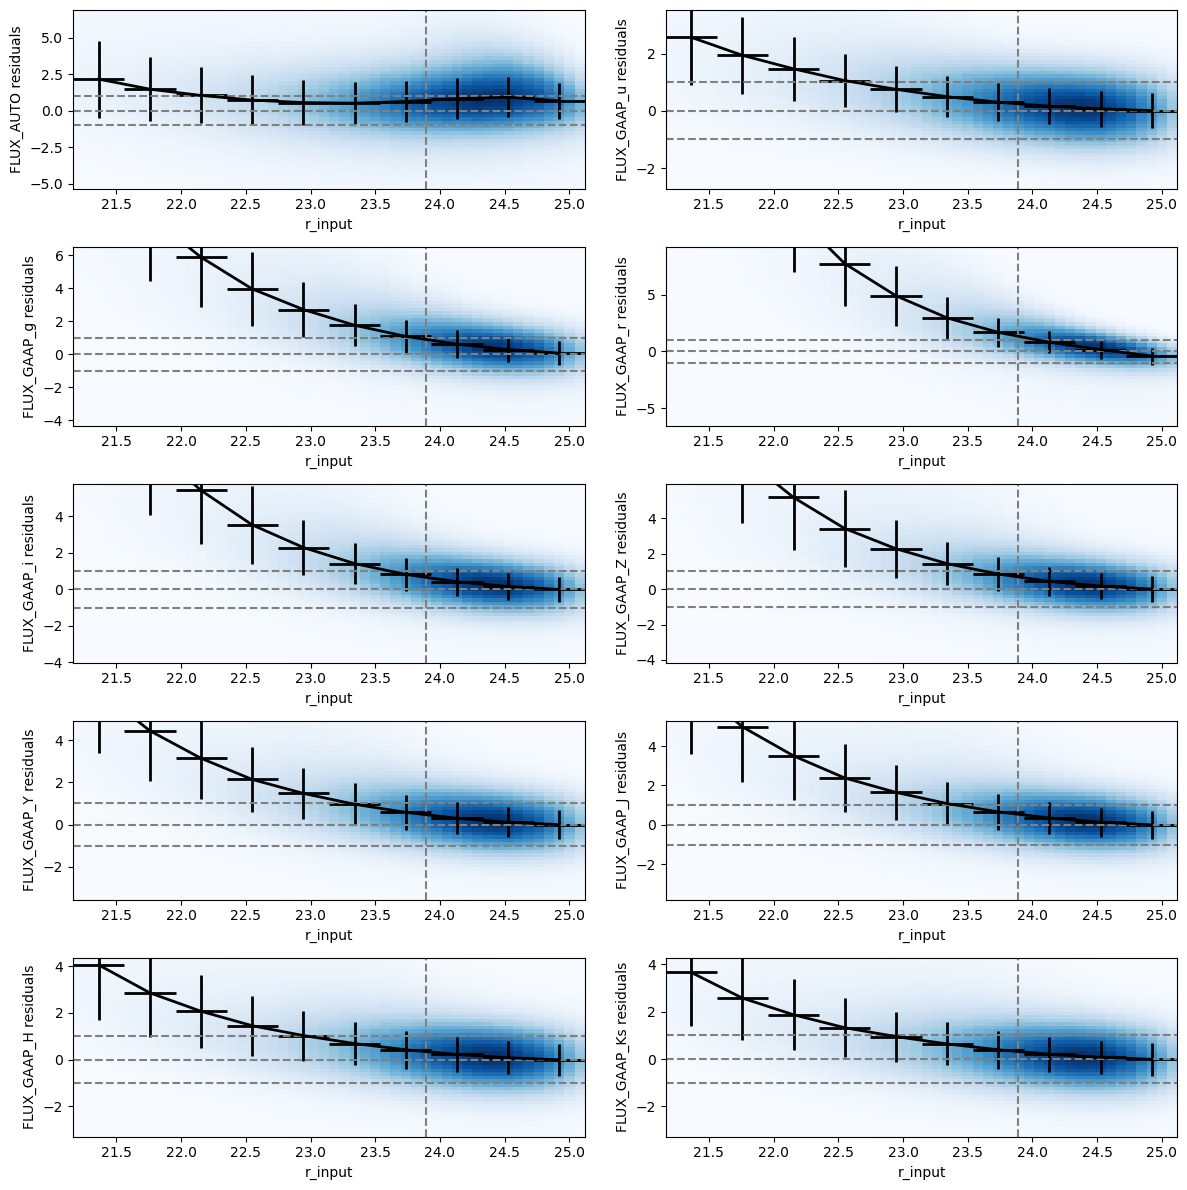

In [43]:
conditional = 'r_input'#, 'Re_input', 'sersic_n_input']

from scipy.stats import binned_statistic

def make_plot(data, conditional, bins=10):
    inputs = ['r_input'] + [b+'_input'  for b in band_names]
    outputs = ['FLUX_AUTO'] + ['FLUX_GAAP_' + b for b in band_names]
    output_errs = ['FLUXERR_AUTO'] + ['FLUXERR_GAAP_' + b for b in band_names]

    
    cond_lims = np.percentile(data[conditional], [5, 95])
    
    
    off = 0
    fig, axs = plt.subplots(5, 2, figsize=(12, 12))
    axs = axs.ravel()
    for input_, output_, output_err_ in zip(inputs, outputs, output_errs):
        flux = 10**(-0.4 * (data[input_] - 30))
        diff = (flux - data[output_]) / data[output_err_] 
        m, s = np.median(diff), median_abs_deviation(diff)
        #range_ = np.percentile(diff, [1, 99])
        range_ = [m - 4*s, m + 4*s]
        
        bin_means, bin_edges, binnumber =\
            binned_statistic(data[conditional], diff, 
                             statistic='median', bins=bins, range=cond_lims)
        bin_stds, bin_edges, binnumber =\
            binned_statistic(data[conditional], diff, 
                             statistic=median_abs_deviation, bins=bins, range=cond_lims)
        
        axs[off].hist2d(data[conditional], diff, range=[cond_lims, range_], 
                        bins=50, density=True, label='residuals', cmap='Blues')
        xerr = (bin_edges[1:] - bin_edges[:-1])/2
        xmean = (bin_edges[1:] + bin_edges[:-1])/2
        
        axs[off].errorbar(xmean, bin_means, xerr=xerr, yerr=bin_stds, color='k', lw=2,
           label='binned statistic of data')
        
        axs[off].axhline(-1, c='grey', ls='--', label='zero')
        axs[off].axhline(0, c='grey', ls='--', label='zero')
        axs[off].axhline(1, c='grey', ls='--', label='zero')
        
        axs[off].axvline(np.median(data[conditional]), c='grey', ls='--', label='zero')
        
        axs[off].set_ylabel(output_ + ' residuals')
        axs[off].set_xlabel(conditional)
        off += 1

    fig.tight_layout()
    
make_plot(data, 'r_input', bins=10)

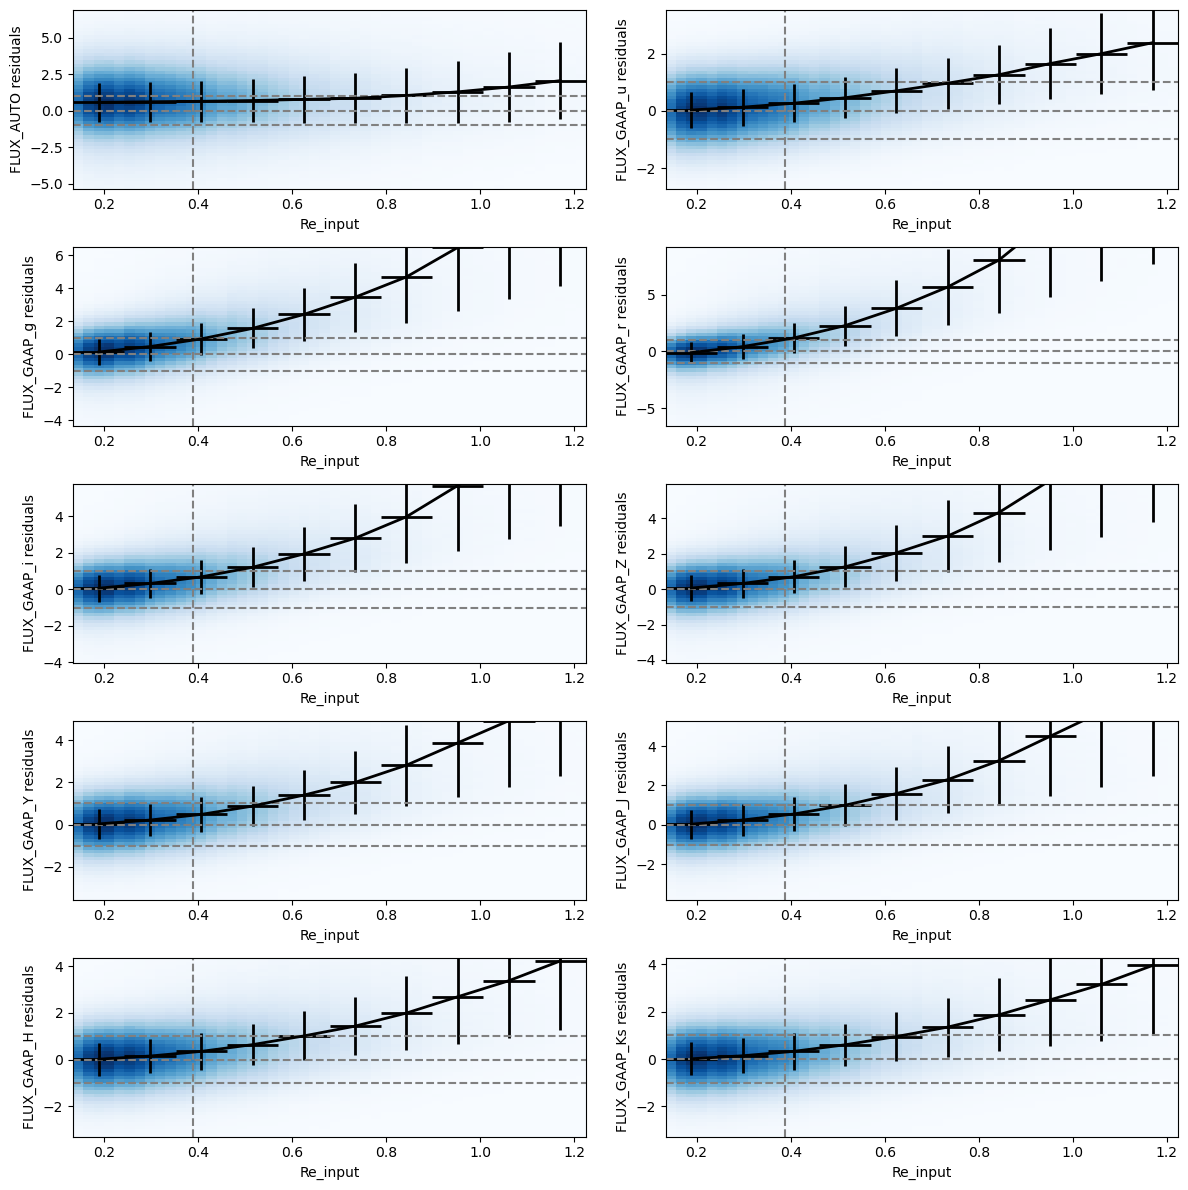

In [44]:
make_plot(data, 'Re_input', bins=10)

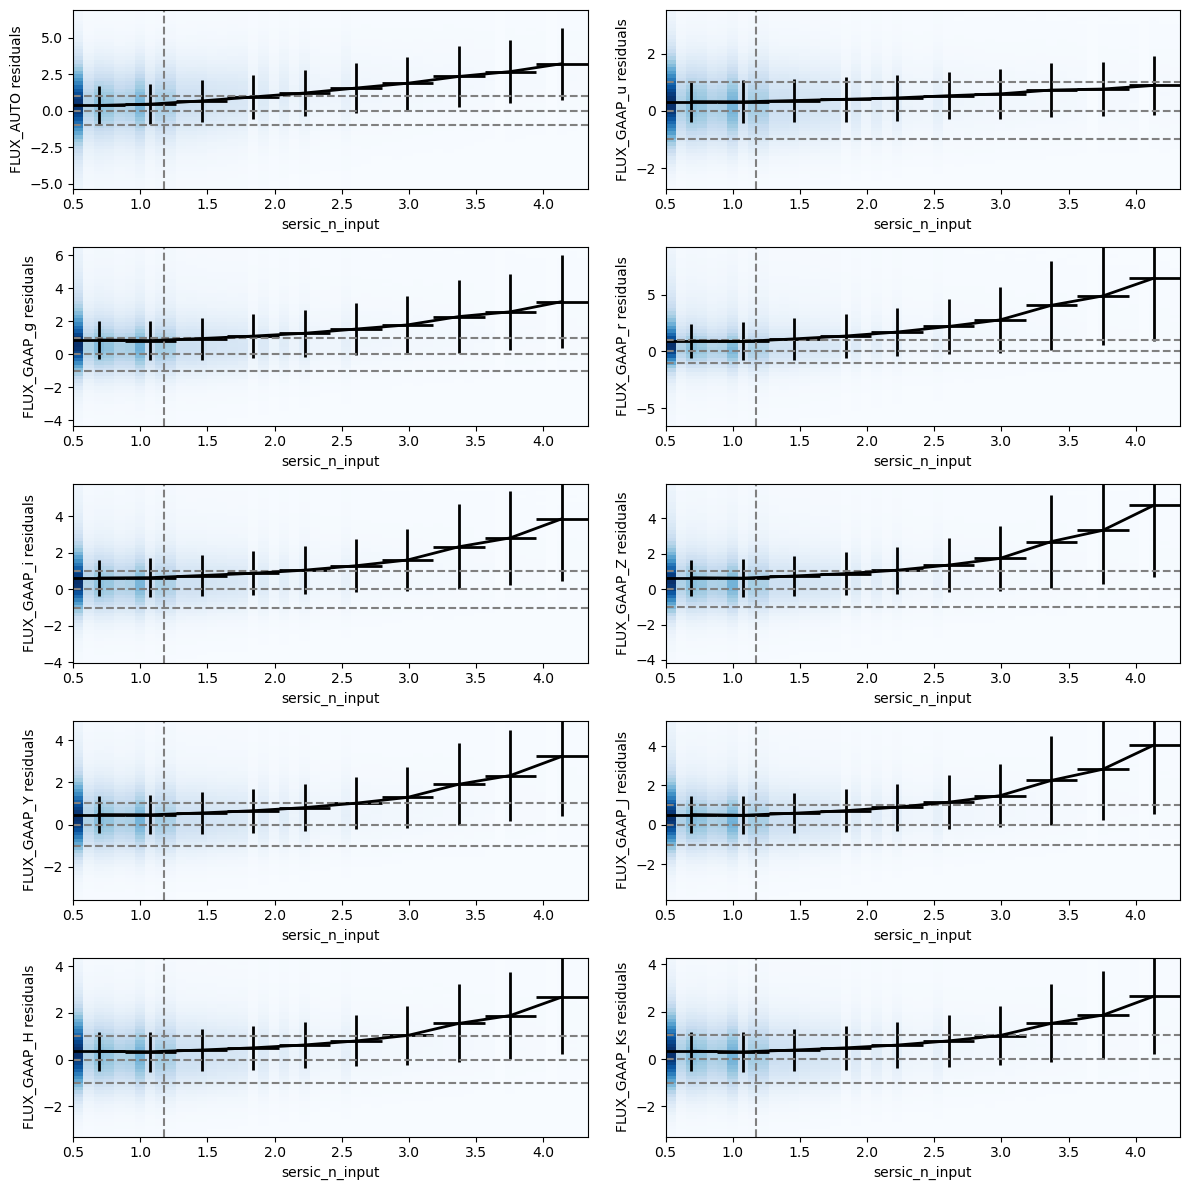

In [45]:
make_plot(data, 'sersic_n_input', bins=10)

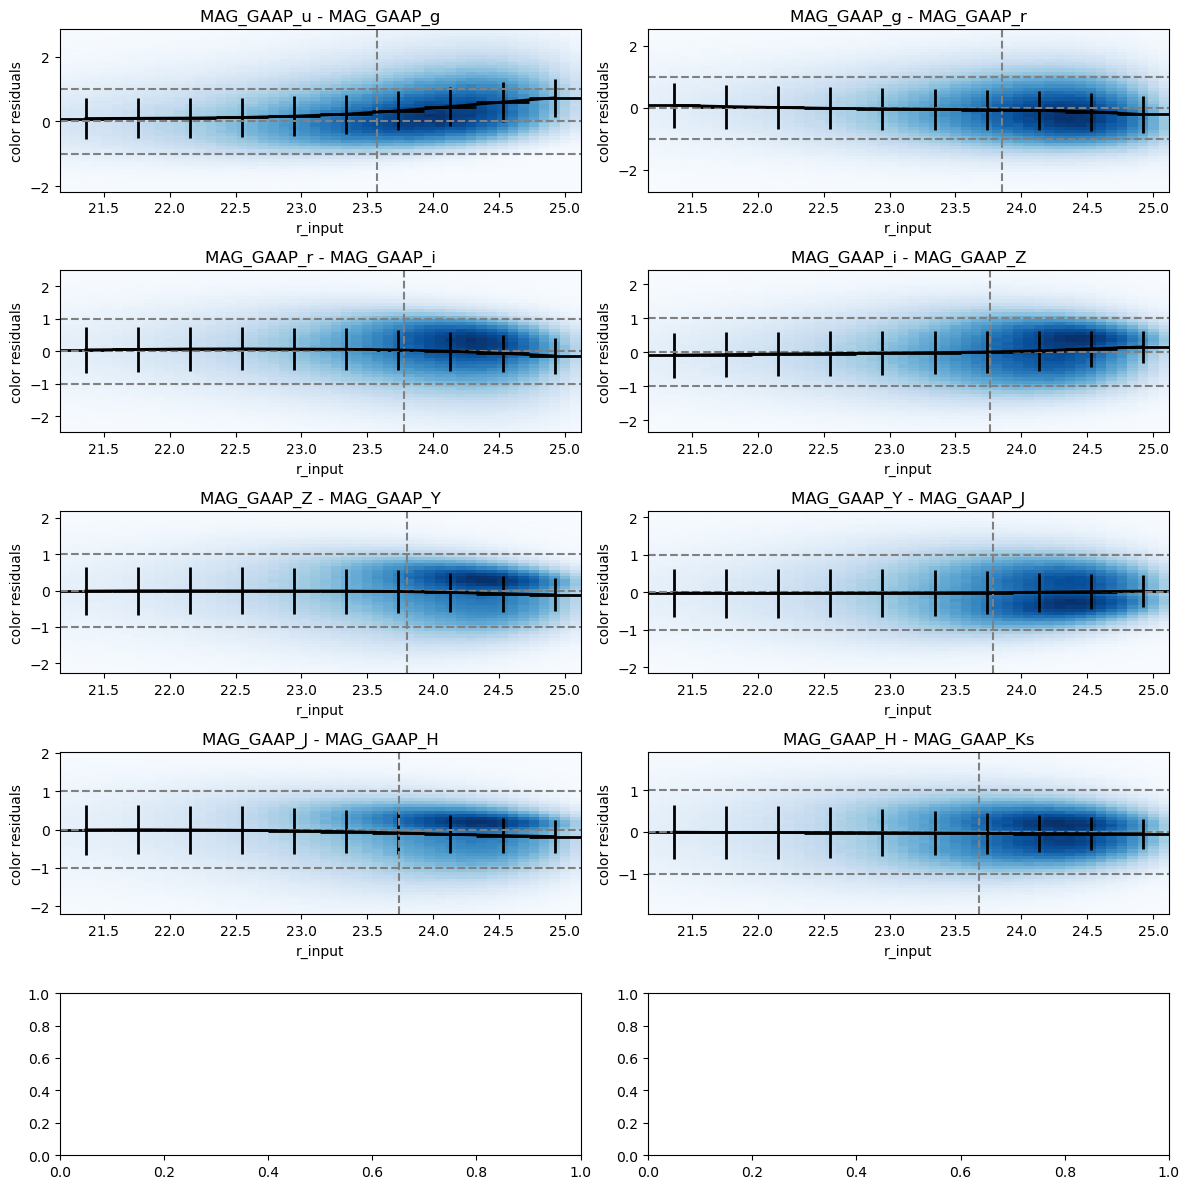

In [46]:


conditional = 'r_input'#, 'Re_input', 'sersic_n_input']

from scipy.stats import binned_statistic

def make_plot(data, conditional, bins=10):
    inputs = [b+'_input'  for b in band_names]
    outputs = ['MAG_GAAP_' + b for b in band_names]
    output_errs = ['MAGERR_GAAP_' + b for b in band_names]

    cond_lims = np.percentile(data[conditional], [5, 95])
    
    off = 0
    fig, axs = plt.subplots(5, 2, figsize=(12, 12))
    axs = axs.ravel()
    for off in range(len(inputs)-1):
        color = data[inputs[off]] - data[inputs[off+1]]
        color_obs = data[outputs[off]] - data[outputs[off+1]]
        total_colorerr = np.sqrt(data[output_errs[off]]**2 + data[output_errs[off+1]]**2)
        diff = (color - color_obs) / total_colorerr
        ind = np.logical_and(data[outputs[off]] < 99, data[outputs[off+1]] < 99)
        diff = diff[ind]
        
        m, s = np.median(diff), median_abs_deviation(diff)
        #range_ = np.percentile(diff, [1, 99])
        range_ = [m - 4*s, m + 4*s]
        
        bin_means, bin_edges, binnumber =\
            binned_statistic(data[conditional][ind], diff, 
                             statistic='median', bins=bins, range=cond_lims)
        bin_stds, bin_edges, binnumber =\
            binned_statistic(data[conditional][ind], diff, 
                             statistic=median_abs_deviation, bins=bins, range=cond_lims)
        
        axs[off].hist2d(data[conditional][ind], diff, range=[cond_lims, range_], 
                        bins=50, density=True, label='residuals', cmap='Blues')
        xerr = (bin_edges[1:] - bin_edges[:-1])/2
        xmean = (bin_edges[1:] + bin_edges[:-1])/2
        
        axs[off].errorbar(xmean, bin_means, xerr=xerr, yerr=bin_stds, color='k', lw=2,
           label='binned statistic of data')
        
        axs[off].axhline(-1, c='grey', ls='--', label='zero')
        axs[off].axhline(0, c='grey', ls='--', label='zero')
        axs[off].axhline(1, c='grey', ls='--', label='zero')
        
        axs[off].axvline(np.median(data[conditional][ind]), c='grey', ls='--', label='zero')
        
        axs[off].set_ylabel('color residuals')
        axs[off].set_title(outputs[off]+' - '+outputs[off+1])
        axs[off].set_xlabel(conditional)
        off += 1

    fig.tight_layout()
    
make_plot(data, 'r_input', bins=10)


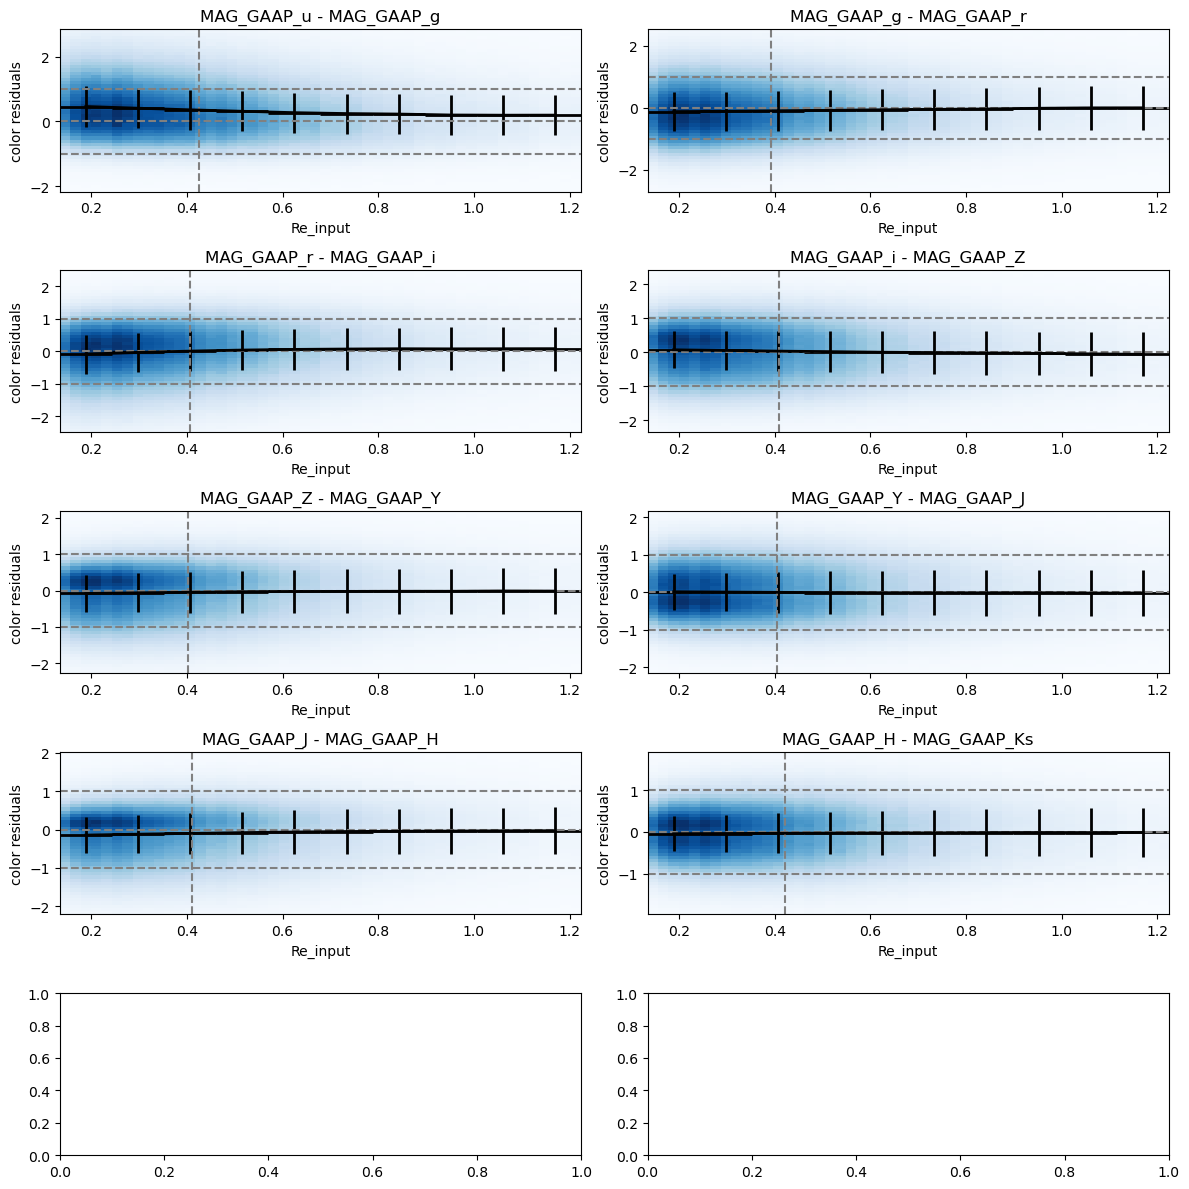

In [47]:
make_plot(data, 'Re_input', bins=10)

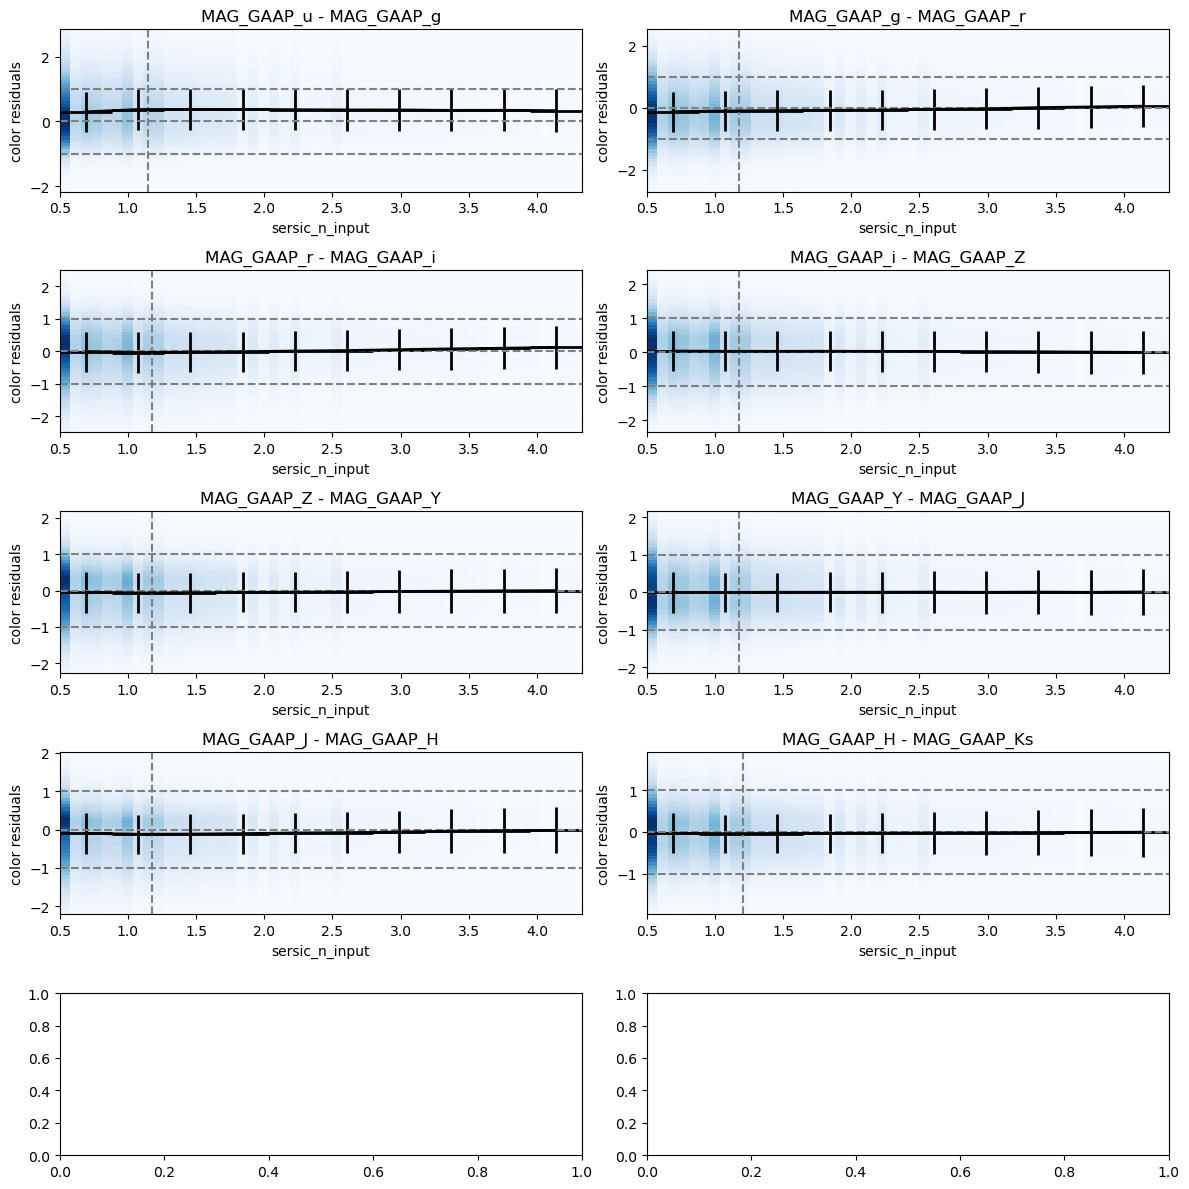

In [48]:
make_plot(data, 'sersic_n_input', bins=10)

In [55]:
# Look at shape of distributions? 
# Residual differences in residuals in the figures above
# are probably due to the shape of the color distribution 
# making the variance not the ideal statistic to look at.

In [ ]:
# Noise can be correlated due to aperture being kept across bands.

In [49]:
# make figures of noise model

In [50]:
# try to denoise the observed GAAP and fit a noise model to see if it is accurate?

In [51]:
# what offsets and error inflation are needed to get very gaussian errors?